# PopGen Learning Guide

This is a learning document for PopGen software.


This document is divided into four main parts:

- **Chapter 1: Input Files for PopGen**  
  Learn how to understand and visualize the input data. This includes detailed explanations of all sample files, marginal files, and mapping files necessary for PopGen.

- **Chapter 2: Prepare Configuration File**  
  Delve into the main structure of the configuration file. This chapter helps you understand how to properly set up the configuration file for running PopGen.

- **Chapter 3: Run PopGen**  
  Follow step-by-step instructions to run PopGen. 

- **Chapter 4: Results Interpretation**  
  Discover how to check the outputs and learn how to verify the accuracy of the results generated by PopGen.

# Install PopGen

In [1]:
%pip install popgen3==3.0.4
# !pip install popgen3==3.0.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
from importlib.metadata import version
print(version("popgen3"))

3.0.4


# Install the Required Python Packages 

In [3]:
# !pip install matplotlib 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from functions import *
from pathlib import Path
import os

In [5]:
os.chdir('..')

In [6]:
os.chdir('./data/Arizona')

### 📁 Data Folder Structure

The **‘Arizona’** folder contains the input files that are prepared to run **PopGen**. The input files are listed as:

#### 📊 Region Marginals:
- `region_household_marginals.csv`
- `region_person_marginals.csv`
- `region_groupquarter_marginals.csv`

#### 🌍 Geo Marginals:
- `household_marginals.csv`
- `person_marginals.csv`
- `groupquarter_marginals.csv`

#### 📋 Data Samples:
- `household_sample.csv`
- `person_sample.csv`
- `groupquarter_sample.csv`

#### 🗺️ Geographical Correspondences:
- `region_geo_mapping.csv`
- `geo_sample_mapping.csv`
- `region_sample_mapping.csv`


![Geographical Hierarchy](figures/d5652251-bf0e-4119-9b95-17ba775fbe8b.png)

# Chapter 1. Input files for PopGen

## 1. Sample Inputs

Read the sample files:
- `household_sample.csv`
- `person_sample.csv`
- `groupquarter_marginals.csv`

In [7]:
household_sample = pd.read_csv('household_sample.csv')
person_sample = pd.read_csv('person_sample.csv')
groupquarter_sample = pd.read_csv('groupquarter_sample.csv')

### 🏠 Household Sample Data

**Contents**:  
This dataset contains household-level records with:

- **`hid`**: Unique household ID.
- **`sample_geo`**: Sample geographical unit ID of each household.
- Household variables provided at two spatial resolutions:
  - Region-level (prefix `r`, e.g., `rhinc`, `rhsize`)
  - Geo-level (no prefix, e.g., `hinc`, `hsize`)


In [8]:
household_sample.head()

,hid,sample_geo,hhtotals,hinc,hsize,hhrtotals,rhinc,rhsize
0,1000000,204,1,3,2,1,3,2
1,1000001,204,1,3,1,1,3,1
2,1000002,300,1,4,5,1,4,5
3,1000003,400,1,2,1,1,2,1
4,1000004,113,1,5,5,1,5,5


In [9]:
print("Number of records in household_sample:", len(household_sample))

Number of records in household_sample: 128056


### 👤 Person Sample Data

Each record represents one individual, uniquely identified by:

- **`hid`**: Household ID (links person to their household).
- **`pid`**: Person ID within the household.

These two together define a person and link them to the corresponding household in the **household sample**.


In [10]:
person_sample.head()

,hid,pid,sample_geo,ptotals,empl,page,psex,rptotals,rempl,rpage,rpsex
0,1000000,1,204,1,1,4,2,1,1,4,2
1,1000000,2,204,1,1,5,1,1,1,5,1
2,1000001,1,204,1,1,6,1,1,1,6,1
3,1000002,1,300,1,3,7,2,1,3,7,2
4,1000002,2,300,1,1,7,1,1,1,7,1


In [11]:
print("Number of records in person_sample:", len(person_sample))

Number of records in person_sample: 334066


### 🏢 Group Quarter Sample Data

**Group Quarters** refer to living arrangements where individuals reside in shared facilities, such as:
- College dormitories
- Military barracks
- Nursing homes
- Correctional facilities

Each record is considered a special household unit, uniquely identified by:

- **`hid`**: Household ID for the group quarter unit.

In [12]:
groupquarter_sample.head()

,hid,sample_geo,gqrtotals,gqtotals
0,1135753,104,1,1
1,1143205,600,1,1
2,1143028,209,1,1
3,1136314,206,1,1
4,1131946,207,1,1


In [13]:
print("Number of records in groupquarter_sample:", len(groupquarter_sample))

Number of records in groupquarter_sample: 15198


### 📊 Creating an Initial Seed Data for IPF or Raking

![ipf](figures/ipf.png)

In [14]:
# pd.crosstab(household_sample['column1'], household_sample['column2'])
pd.crosstab(household_sample['hsize'], household_sample['hinc'])

hinc,1,2,3,4,5
hsize,,,,,
1,9355,11351,10150,1893,2169
2,3614,8809,17422,6571,11413
3,1432,2773,5685,2577,4922
4,959,2045,4277,2182,4857
5,608,1313,2430,1133,2049
6,308,634,1196,471,919
7,230,463,843,354,649


### 📊 Creating an Initial Frequency Matrix for IPU Reweighting

Merging the **household** and **person** datasets allows you to generate an initial frequency matrix for **Iterative Proportional Updating (IPU)**.  
(This matrix visualizes the initial data distribution for IPU.)


**Example from the class slides**:

![ipu](figures/ipu.png)

👉 **Interactive Visualization**  
You can dynamically select different **household** and **person** control variables below to explore various joint frequency tables.


In [15]:
# Decide control variables 
household_vars = ['hinc']  
person_vars = ['psex']  #,'empl'
# Merge the selected control variables at household and personal level to create a frequency matrix for IPU 
IPU_Frequency_Matrix = merge_and_encode_joint(household_sample, person_sample, household_vars, person_vars)
IPU_Frequency_Matrix.head()

,hid,hinc_1,hinc_2,hinc_3,hinc_4,hinc_5,psex_1,psex_2
0,1000000,0,0,1,0,0,1,1
1,1000001,0,0,1,0,0,1,0
2,1000002,0,0,0,1,0,2,3
3,1000003,0,1,0,0,0,1,0
4,1000004,0,0,0,0,1,4,1


## 2. Marginal Inputs for PopGen

PopGen utilizes marginal input data at two spatial resolutions: **region** and **geo**.

### 📍 Geo-Level Marginals
- **Files**:
  - `person_marginals.csv`
  - `household_marginals.csv`
  - `groupquarter_marginals.csv`

### 🏛️ Region-Level Marginals
- **Files**:
  - `region_person_marginals.csv`
  - `region_household_marginals.csv`
  - `region_groupquarter_marginals.csv`


In [16]:
# Define paths to marginal CSV files
paths = {
    'person_marginal': 'person_marginals.csv',
    'household_marginal': 'household_marginals.csv',
    'groupquarter_marginals': 'groupquarter_marginals.csv',
    'region_person_marginal': 'region_person_marginals.csv',
    'region_household_marginal': 'region_household_marginals.csv',
    'region_groupquarter_marginals': 'region_groupquarter_marginals.csv'
}

# Dynamically read marginal files 
for key, path in paths.items():
    globals()[key] = read_marginal_data(path)

In [17]:
household_marginal.head()

hhtotals hsize                              hinc                 \
                  1     1     2    3    4    5   6   7    1    2    3    4   
geo                                                                          
4013010101     2070   291  1386   85  188  105  15   0   45  224  584  256   
4013010102     2092   128  1810  101   39    0  14   0  162  202  176  238   
4013030401     2150   588  1422   22   65   42  11   0  162  282  367  262   
4013030402     1909   471  1028  201  153   34   0  22  201  294  370  229   
4013040502     2397   994   921  203  166   77  36   0  508  624  705  169   

                  
               5  
geo               
4013010101   961  
4013010102  1314  
4013030401  1077  
4013030402   815  
4013040502   391

In [18]:
region_household_marginal

hhrtotals  rhsize                                                rhinc  \
               1       1       2       3       4      5      6      7       1   
region                                                                          
1        1144732  329473  376283  165324  138494  74252  36062  24844  143126   
2          46627   13668   25304    3119    2504   1251    521    260    3798   
3           2591     863     856     297     231    171     82     91     533   
4           5905     929    2373     878     823    626    153    123     650   
5            852     155     108     113     140    110     64    162     212   
6          20806    3201    6176    3528    3906   2371   1045    579    1909   
7         143015   28954   47776   23275   24696  11400   4541   2373    7890   
8          97150   18549   39327   15465   14855   5698   2301    955    4976   
9           4162     419    3196     186     227    105     29      0     207   

                                        
             2       3       4       5  
region                                  
1       243231  380293  135267  242815  
2        10556   16644    6758    8871  
3          836     837     137     248  
4          874    1794     805    1782  
5          234     278      50      78  
6         3527    8386    3193    3791  
7        17097   40294   22367   55367  
8        10341   27551   14048   40234  
9          426     760     494    2275

### 📍 Summary of Geographical Units in Marginal and Sample Data

In [19]:
# Summary for Regional Marginal Data
regional_count = region_household_marginal.index.nunique()
regional_ids = ', '.join(map(str, region_household_marginal.index.unique()))
print(f"Regional marginal data has {regional_count} regions: [{regional_ids}]")

# Summary for Geo Marginal Data
geo_count = household_marginal.index.nunique()
geo_ids = ', '.join(map(str, household_marginal.index.unique()[:5])) + ', ...'
print(f"Geo marginal data has {geo_count} geos, including: [{geo_ids}]")

# Summary for Sample Data
sample_geo_count = household_sample['sample_geo'].nunique()
sample_geo_ids = ', '.join(map(str, household_sample['sample_geo'].unique()[:5])) + ', ...'
print(f"Sample data includes {sample_geo_count} unique sample geo IDs, such as: [{sample_geo_ids}]")

Regional marginal data has 9 regions: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Geo marginal data has 916 geos, including: [4013010101, 4013010102, 4013030401, 4013030402, 4013040502, ...]
Sample data includes 54 unique sample geo IDs, such as: [204, 300, 400, 113, 109, ...]


![Geographical Hierarchy](figures/d5652251-bf0e-4119-9b95-17ba775fbe8b.png)

## 3. 📌 Geographical Mapping Files

The marginal and sample datasets described above involve three distinct geographical units:

- **Region**: Census County Subdivisions  
- **Geo**: Census Tracts  
- **Sample_geo**: Public Use Microdata Areas (PUMAs)

To align these datasets correctly across resolutions, PopGen requires geographical mapping files:

| Mapping File                 | Description                                           |
|------------------------------|-------------------------------------------------------|
| `region_geo_mapping.csv`     | Links regional units to geo-level units               |
| `geo_sample_mapping.csv`     | Links geo-level units to sample_geo IDs (PUMAs)       |
| `region_sample_mapping.csv`  | (Optional) Directly links regional units to sample IDs|



In [20]:
# Read mapping files 
geo_sample_mapping = pd.read_csv('geo_sample_mapping.csv')
region_geo_mapping = pd.read_csv('region_geo_mapping.csv')

In [21]:
# Count how many unique geo units are contained in each region
region_geo_counts = region_geo_mapping.groupby('region')['geo'].nunique().reset_index(name='total geo counts')
region_geo_counts.loc['Total'] = [region_geo_counts['region'].count(), region_geo_counts['total geo counts'].sum()]
print(region_geo_counts.to_string(index=False))

 region  total geo counts
      1               720
      2                23
      3                 2
      4                 8
      5                 2
      6                11
      7                90
      8                58
      9                 2
      9               916


In [22]:
# region_geo_mapping[region_geo_mapping['region']== 9].geo.unique()
region_geo_mapping.query("region == 8").geo.unique()

array([4013030401, 4013030402, 4013610000, 4013610100, 4013610200,
       4013610300, 4013610400, 4013610500, 4013610600, 4013610700,
       4013610800, 4013610900, 4013611000, 4013611100, 4013611200,
       4013611300, 4013611400, 4013611500, 4013611600, 4013611700,
       4013611800, 4013611900, 4013612000, 4013612200, 4013612300,
       4013612400, 4013612500, 4013612600, 4013612700, 4013612800,
       4013612900, 4013613000, 4013613100, 4013613200, 4013613300,
       4013613400, 4013613500, 4013613600, 4013613700, 4013613800,
       4013613900, 4013614000, 4013614100, 4013614200, 4013614300,
       4013614500, 4013615500, 4013615600, 4013615700, 4013615800,
       4013615900, 4013616000, 4013616100, 4013617600, 4013617700,
       4013617800, 4013617900, 4013618000])

In [23]:
# Count how many unique geo units are contained in each sample geo 
sample_geo_counts = geo_sample_mapping.groupby('sample_geo')['geo'].count().reset_index(name='total geo counts')
sample_geo_counts.loc['Total'] = [sample_geo_counts['sample_geo'].count(), sample_geo_counts['total geo counts'].sum()]
print(sample_geo_counts.to_string(index=False))

 sample_geo  total geo counts
        100                22
        101                37
        102                34
        103                27
        104                26
        105                30
        106                25
        107                27
        108                24
        109                23
        110                33
        111                24
        112                26
        113                25
        114                25
        115                23
        116                29
        117                28
        118                36
        119                23
        120                25
        121                26
        122                22
        123                24
        124                24
        125                22
        126                29
        127                27
        128                23
        129                23
        130                30
        131                23
        13

### 🔍 Checking Marginal Data Consistency Across Geographic Levels

When performing population synthesis at multiple geographic levels, ensure consistency of totals across levels:

- Aggregate geo-level marginal data to region-level.

- Verify that aggregated geo-level totals match region-level totals.

Inconsistent totals across levels can result in marginal distribution errors.


In [24]:
household_marginal_grouped_by_region = group_marginal_geo_by_region(household_marginal, region_geo_mapping)

/Users/chnfanyu/ASU Dropbox/Yu Fan/Mac/Documents/GitHub/PopGen3/popgen_learning/functions.py:113: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  household_marginal_grouped_by_region = household_marginal_copy.groupby('region').sum()


In [25]:
household_marginal_grouped_by_region

geo hhtotals   hsize                                        \
                             1       1       2       3       4      5      6   
region                                                                         
1       2889517662221  1144732  329473  376283  165324  138494  74252  36062   
2         92299931945    46627   13668   25304    3119    2504   1251    521   
3          8027882500     2591     863     856     297     231    171     82   
4         32110260633     5905     929    2373     878     823    626    153   
5          8027882100      852     155     108     113     140    110     64   
6         44143556866    20806    3201    6176    3528    3906   2371   1045   
7        361240376333   143015   28954   47776   23275   24696  11400   4541   
8        232788397403    97150   18549   39327   15465   14855   5698   2301   
9          8026020203     4162     419    3196     186     227    105     29   

                 hinc                                  
            7       1       2       3       4       5  
region                                                 
1       24844  143126  243231  380293  135267  242815  
2         260    3798   10556   16644    6758    8871  
3          91     533     836     837     137     248  
4         123     650     874    1794     805    1782  
5         162     212     234     278      50      78  
6         579    1909    3527    8386    3193    3791  
7        2373    7890   17097   40294   22367   55367  
8         955    4976   10341   27551   14048   40234  
9           0     207     426     760     494    2275

In [26]:
region_household_marginal

hhrtotals  rhsize                                                rhinc  \
               1       1       2       3       4      5      6      7       1   
region                                                                          
1        1144732  329473  376283  165324  138494  74252  36062  24844  143126   
2          46627   13668   25304    3119    2504   1251    521    260    3798   
3           2591     863     856     297     231    171     82     91     533   
4           5905     929    2373     878     823    626    153    123     650   
5            852     155     108     113     140    110     64    162     212   
6          20806    3201    6176    3528    3906   2371   1045    579    1909   
7         143015   28954   47776   23275   24696  11400   4541   2373    7890   
8          97150   18549   39327   15465   14855   5698   2301    955    4976   
9           4162     419    3196     186     227    105     29      0     207   

                                        
             2       3       4       5  
region                                  
1       243231  380293  135267  242815  
2        10556   16644    6758    8871  
3          836     837     137     248  
4          874    1794     805    1782  
5          234     278      50      78  
6         3527    8386    3193    3791  
7        17097   40294   22367   55367  
8        10341   27551   14048   40234  
9          426     760     494    2275

## 4. 📊 Compare Sample and Marginal Distributions

Before running PopGen, it’s essential to visually check how the **survey sample distribution** compares against the **marginal distribution** at the selected geographical scale.

### 🚩 Instructions for checking distributions:

1. **Run the provided code cell** to start the visualization.
2. **Choose geographical scale**:
   - Type `'region'` for regional-level variables.
   - Type `'geo'` for geo-level variables.
   - Press `Enter`.

3. **Select Area ID**:
   - Enter the specific geographical ID (e.g., `8` for Region, or `4013010101` for Geo).
   - Press `Enter`.

4. **Select a variable**:
   - If you've selected `'region'`, choose from regional-level variables, such as:  
     - ✅ `rhsize`, `rhinc`, `rhhtotals`, `rpage`, `rpsex`, etc. (**Must start with `r`**)
   
   - If you've selected `'geo'`, choose from geo-level variables, such as:  
     - ✅ `hsize`, `hinc`, `hhtotals`, `page`, `psex`, etc. (**Must not start with `r`**)

   - Type your variable choice and press `Enter`.


The resulting plot clearly displays the marginal distribution (**target distribution**) versus the sample survey distribution (**initial sample**).

Use this visualization to verify alignment or identify discrepancies before performing weighting processes like IPU or IPF.


Please enter 'region' or 'geo': region
Please enter the geographical area code (e.g., '8' or '4013010101'): 8
Please enter the control variable (e.g., 'rhsize' or 'hsize'): rhsize


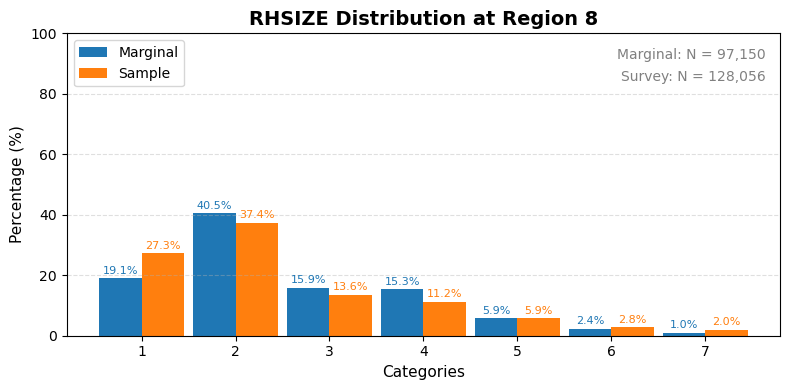

In [28]:
plot_distribution_comparison(
    household_marginal,
    region_household_marginal,
    household_sample=household_sample)

### 🔹 Try **Person Variables** Comparision:

- If you've selected `'region'`, choose from regional-level variables:
 
  ✅ `rpage`, `rpsex`, `rempl`, `rptotals` (Must start with `r`)

- If you've selected `'geo'`, choose from geo-level variables:

  ✅ `page`, `psex`, `empl`, `ptotals` (Must not start with `r`)

Type your variable choice and press `Enter`.


Please enter 'region' or 'geo': region
Please enter the geographical area code (e.g., '8' or '4013010101'): 8
Please enter the control variable (e.g., 'rhsize' or 'hsize'): rempl


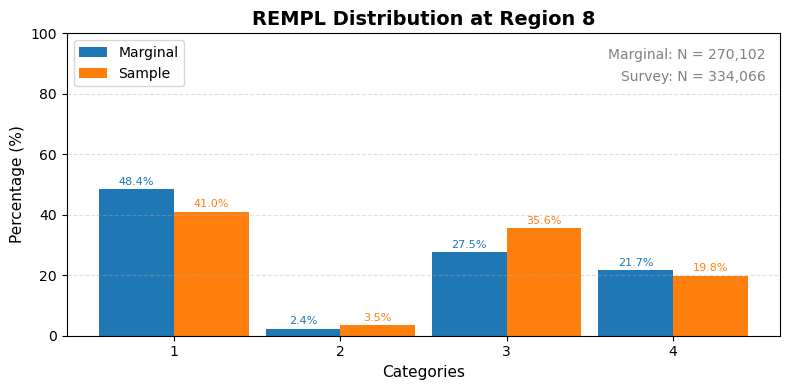

In [31]:
plot_distribution_comparison(
    person_marginal,
    region_person_marginal,
    household_sample=person_sample
)

# Chapter 2. Prepare Configuration File

### Configuration File:
- `configuration.yaml` or `configuration_arizona.yaml`

###  Configuration.yaml Key Sections:  

The `configuration.yaml` file is essential for getting PopGen started. It has many parts, but you really only need to focus on a few key sections for initial setup and later modification.

#### Project Wide Setting:

This section outlines the fundamental settings needed to commence a synthetic population project.

```yaml
# Determine whether to synthesize the population
synthesize: True  # True for generating a synthetic population, 
# Project name
name: Arizona_Synthetic_Population  # Name of the project. you can name your project
# Project location
location: ./Arizona/  # Path to the input data folder. Use forward slashes as separators, e.g., C:/SynTest/Houston/.


#### Input Data Files:

```yaml
inputs:
  # Define entities present in the synthetic population
  entities: [household, groupquarter, person]
  housing_entities: [household, groupquarter]
  person_entities: [person]
  
  # Specify column names for key identifiers for all data
  column_names:
    hid: hid  # Household ID
    pid: pid  # Person ID
    geo: geo  # Geographical unit
    region: region  # Regional unit
    sample_geo: sample_geo  # Sample geographical unit

  # Paths to CSV files for geographical mappings and sample data
  location:
    geo_corr_mapping:
      geo_to_sample: geo_sample_mapping.csv  
      region_to_sample: region_sample_mapping.csv  
      region_to_geo: region_geo_mapping.csv  
    sample:
      household: household_sample.csv  
      person: person_sample.csv  
      groupquarter: groupquarter_sample.csv  
    marginals:
      geo:
        household: household_marginals.csv  
        person: person_marginals.csv  
        groupquarter: groupquarter_marginals.csv  
      region:
        household: region_household_marginals.csv  
        person: region_person_marginals.csv  
        groupquarter: region_groupquarter_marginals.csv  


#### Control Variables

```yaml
scenario:
  - description: Arizona TAZ Scenario 
    apply_region_controls: True
    control_variables:
      region:
        household: [rinc, hhrtotals]
        groupquarter: [gqrtotals]
        person: [rpsex, rpage, rempl, rptotals]
      geo:
        household: [hinc, hhtotals]
        groupquarter: [gqtotals]
        person: [psex, page, empl, ptotals]


#### Select Study Area
```yaml
geos_to_synthesize:
  region:
    # Leave ids empty if synthesizing all regions or specify with IDs like [8]
    ids: [9]
    all_ids: False  
  geo:
    ids: []  # Specify geo IDs to include or leave empty to include all
    all_ids: True  # Set to True to include all geo units


# Chapter 3. 🛠️ Running PopGen  

---

## 📌 Scenario 1: Key Information

- **Study Region**: 9

- **Control Variables**:
  - **Geo Level**:
    - **Household**: `hinc`, `hhtotals`
    - **Person**: `psex`, `page`, `empl`, `ptotals`
    - **Groupquarter**: `gqtotals`
  - **Region Level**:
    - **Household**: `rhinc`, `hhrtotals`
    - **Person**: `rpsex`, `rpage`, `rempl`, `rptotals`
    - **Groupquarter**: `gqtotals`
---

## 🚩 Execute PopGen Software

### 📂 Step 1. Check Configuration File  

- Open the configuration file:
```yaml
\data\configuration_arizona.yaml
```
- Ensure it includes all the **"Key Information"** listed above (Scenario 1).

---

### 📂 Step 2. Verify Input Files  

- Open the data directory:
```yaml
\data\Arizona\
```
- Confirm that all required input files exist, and their paths and names match those specified in the configuration file.

---

### 🚀 Step 3. Run `PopGen3`


In [32]:
os.chdir('..')

In [33]:
import popgen
popgen.run('configuration_arizona.yaml')

2026-01-10 22:41:39 - INFO - Configuration loaded successfully.
2026-01-10 22:41:39 - INFO - Project initialized: Arizona_Synthetic_Population at /Users/chnfanyu/ASU Dropbox/Yu Fan/Mac/Documents/GitHub/PopGen3/data/Arizona
2026-01-10 22:41:39 - INFO - Loading database data...
2026-01-10 22:41:39 - INFO - Database loaded successfully.
2026-01-10 22:41:39 - INFO - Running scenario: Arizona TAZ Scenario
2026-01-10 22:41:39 - WARNING - Ambiguous geos_to_synthesize.region: both ids and all_ids=True were provided. Honoring ids and ignoring all_ids to avoid an accidental full run.
2026-01-10 22:41:39 - INFO - Scenario geography selection resolved: 1 region ids, 2 geo ids.
2026-01-10 22:41:39 - INFO -   Region ids (preview): [9]
2026-01-10 22:41:39 - INFO -   Geo ids (preview):    [4013010101, 4013010102]
2026-01-10 22:41:39 - INFO - Geographical IDs enumerated successfully.
2026-01-10 22:41:39 - INFO - Region level IPF:
2026-01-10 22:41:39 - INFO - Running IPF for household
2026-01-10 22:41:3

# Chapter 4: 📖 Results Interpretation

Upon successful execution of **PopGen**, a results folder similar to:

```
📁 2024-04-04 00-00-00 Arizona TAZ Scenario
```

is generated inside your `Arizona` data directory, containing all outputs from the scenario run.


---

## ✅ Key Output Files to Check:

- **`housing_synthetic.csv`**  
  Synthetic household-level population data.

- **`person_synthetic.csv`**  
  Synthetic person-level population data.

- **`weights.csv`**  
  Final household weights, calibrated to match marginal distributions.

- **`Arizona TAZ Scenario.yaml`**  
  Scenario configuration reflecting settings from `configuration_arizona.yaml`.




## 📌 Reviewing `weights.csv`:

The `weights.csv` file maps each synthetic household (`hid`) to corresponding weights for every geo unit, structured clearly as:

- Rows: unique household IDs (`hid`)
- Columns: geographical units (`geo IDs`), with associated weights as values

In [34]:
# Read weights file

base_path = Path('./Arizona')
latest_folder = max((f for f in base_path.iterdir() if f.is_dir()), key=os.path.getmtime)

weights_path = latest_folder / 'weights.csv'
weights = pd.read_csv(weights_path)

print(f"Loaded weights from: {weights_path}")

Loaded weights from: Arizona/2026-01-10 22-41-47 Arizona TAZ Scenario/weights.csv


In [35]:
weights.head()

,hid,4013010101,4013010102
0,1000000,0.000712,1.719683e-04
1,1000001,0.009309,1.015861e-03
2,1000002,0.008387,7.000000e-10
3,1000003,0.005878,4.345098e-03
4,1000004,0.063439,5.200000e-09


In [36]:
print("Number of records in weights:", len(weights))

Number of records in weights: 143254


In [37]:
household_sample.shape[0]

128056

In [38]:
groupquarter_sample.shape[0]

15198

## 📌 Validating Weighted Samples Against Marginals

Below, we've provided a tool to validate how effectively the generated **weights** align the sample distribution (**weighted**) with the target marginal distributions (**marginal**).

- **Unweighted** columns represent the original sample distributions.
- **Weighted** columns reflect the distributions after applying generated weights.
- **Marginal** columns display the target marginal distributions for comparison.
- **Delta (W - M)** highlights differences between weighted samples and marginals.

👉 **Important Check**:  
Ideally, the **Delta (W - M)** values should be very close to `0`, indicating a perfect or near-perfect match after weighting.

Use the tables below to verify the weighting accuracy at both **Geo-level** and **Region-level**:


In [39]:
geo_tables, region_tables = compare_all_marginal_distributions_with_person(
    household_sample,
    person_sample,
    weights,
    household_marginal,
    region_household_marginal,
    person_marginal,
    region_person_marginal,
    region_geo_mapping
)

In [40]:
for geo_id, df in geo_tables.items():
    print(f"\n📍 GEO: {geo_id}")
    print(df.to_string(index=False))


📍 GEO: 4013010101
Variable  Category  Unweighted %  Weighted %  Marginal %  Delta (W - M) %
hhtotals         1        100.00      100.00      100.00            -0.00
    hinc         1         12.89        2.17        2.17            -0.00
    hinc         2         21.39       10.82       10.82            -0.00
    hinc         3         32.80       28.21       28.21            -0.00
    hinc         4         11.85       12.37       12.37             0.00
    hinc         5         21.07       46.43       46.43             0.00
   hsize         1         27.27       14.06       14.06            -0.00
   hsize         2         37.35       66.96       66.96            -0.00
   hsize         3         13.58        4.11        4.11            -0.00
   hsize         4         11.18        9.08        9.08            -0.00
   hsize         5          5.88        5.07        5.07            -0.00
   hsize         6          2.76        0.72        0.72            -0.00
   hsize         7 

In [41]:
for region_id, df in region_tables.items():
    print(f"\n🏛️ REGION: {region_id}")
    print(df.to_string(index=False))


🏛️ REGION: 9
 Variable  Category  Unweighted %  Weighted %  Marginal %  Delta (W - M) %
hhrtotals         1        100.00      100.00      100.00             0.00
    rhinc         1         12.89        4.97        4.97            -0.00
    rhinc         2         21.39       10.23       10.24            -0.00
    rhinc         3         32.80       18.26       18.26            -0.00
    rhinc         4         11.85       11.87       11.87             0.00
    rhinc         5         21.07       54.66       54.66             0.00
   rhsize         1         27.27       10.07       10.07            -0.00
   rhsize         2         37.35       76.79       76.79            -0.00
   rhsize         3         13.58        4.47        4.47            -0.00
   rhsize         4         11.18        5.45        5.45            -0.00
   rhsize         5          5.88        2.52        2.52             0.00
   rhsize         6          2.76        0.70        0.70            -0.00
   rhsize  

## 📋 Reviewing Synthetic Population Outputs

Below are the synthetic population files generated by PopGen:

- **`housing_synthetic.csv`**:  
  Synthetic households dataset.  
  Each household is assigned a unique identifier (**`unique_housing_id`**), alongside geographical and demographic attributes.

- **`person_synthetic.csv`**:  
  Synthetic individuals dataset, linked to synthetic households by **`hid`**



In [42]:
base_path = Path('./Arizona')
latest_folder = max((f for f in base_path.iterdir() if f.is_dir()), key=os.path.getmtime)

In [43]:
# Read synthetic files
housing_synthetic_path = latest_folder / 'housing_synthetic.csv'
housing_synthetic = pd.read_csv(housing_synthetic_path)

person_synthetic_path = latest_folder / 'person_synthetic.csv'
person_synthetic = pd.read_csv(person_synthetic_path)

In [44]:
housing_synthetic.head()

,unique_housing_id,hid,geo,unique_id_in_geo,sample_geo,hhtotals,hinc,hsize,hhrtotals,rhinc,rhsize,entity,gqrtotals,gqtotals
0,0,1000113,4013010101,1,107,1.0,5.0,2.0,1.0,5.0,2.0,household,0.0,0.0
1,1,1000160,4013010101,2,500,1.0,5.0,2.0,1.0,5.0,2.0,household,0.0,0.0
2,2,1000338,4013010101,3,102,1.0,4.0,1.0,1.0,4.0,1.0,household,0.0,0.0
3,3,1000454,4013010101,4,204,1.0,5.0,2.0,1.0,5.0,2.0,household,0.0,0.0
4,4,1000477,4013010101,5,112,1.0,5.0,2.0,1.0,5.0,2.0,household,0.0,0.0


In [45]:
print("Number of records in housing_synthetic:", len(housing_synthetic))

Number of records in housing_synthetic: 4173


In [46]:
housing_synthetic[housing_synthetic['geo'] == 4013010101]['hid'].value_counts().head(20)

1046937    3
1041098    3
1041891    3
1057109    3
1033513    3
1055443    3
1072833    3
1111751    3
1007847    2
1074716    2
1089615    2
1052095    2
1043176    2
1118251    2
1089179    2
1088800    2
1075010    2
1042175    2
1007429    2
1059184    2
Name: hid, dtype: int64

In [47]:
weights.sort_values(by='4013010101', ascending=False).head(20)

,hid,4013010101,4013010102,region_9
111751,1111751,2.563644,5.400000e-08,2.563644
57383,1057383,2.031356,1.419000e-07,2.031356
98599,1098599,1.756427,2.969774e-02,1.786125
47025,1047025,1.690836,3.274860e-02,1.723585
67648,1067648,1.297058,3.570000e-08,1.297058
41891,1041891,1.259663,1.018000e-07,1.259663
57109,1057109,1.247064,3.283525e-01,1.575417
75506,1075506,1.056650,2.800000e-08,1.056650
54857,1054857,1.029684,6.028912e-01,1.632575
101095,1101095,0.979756,2.750000e-08,0.979756


In [48]:
person_synthetic.head()

,unique_person_id,hid,geo,unique_id_in_geo,pid,sample_geo,ptotals,empl,page,psex,rptotals,rempl,rpage,rpsex,entity
0,0,1000113,4013010101,1,1,107,1,1,7,2,1,1,7,2,person
1,1,1000113,4013010101,1,2,107,1,1,3,2,1,1,3,2,person
2,2,1000160,4013010101,2,1,500,1,3,8,2,1,3,8,2,person
3,3,1000160,4013010101,2,2,500,1,3,9,1,1,3,9,1,person
4,4,1000338,4013010101,3,1,102,1,1,6,1,1,1,6,1,person


In [49]:
print("Number of records in person_synthetic:", len(person_synthetic))

Number of records in person_synthetic: 8988


## 📋 Validating Generated Synthetic Population Against Marginals


                     📍 GEO: 4013010101                      



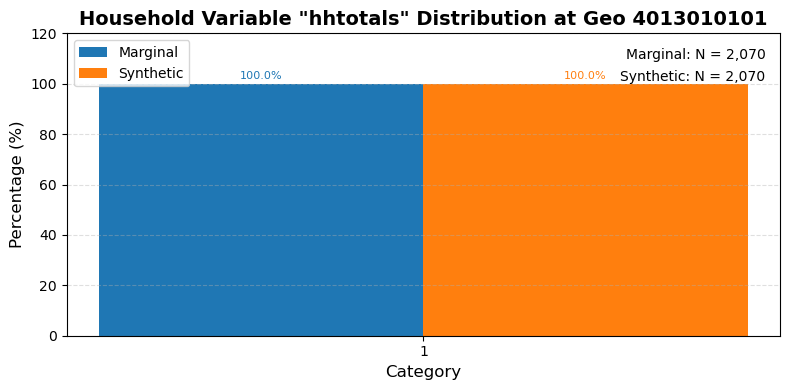

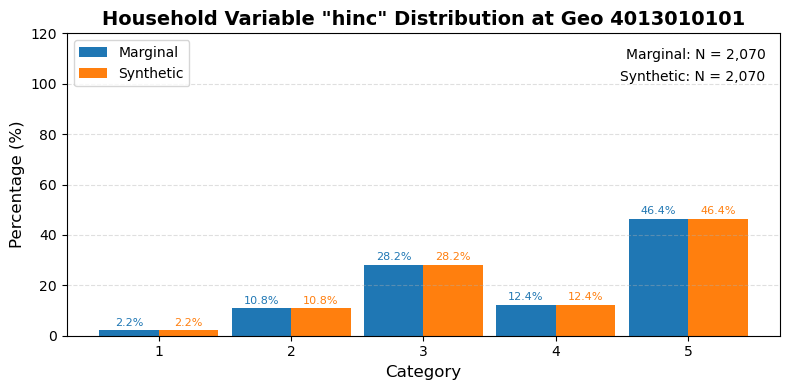

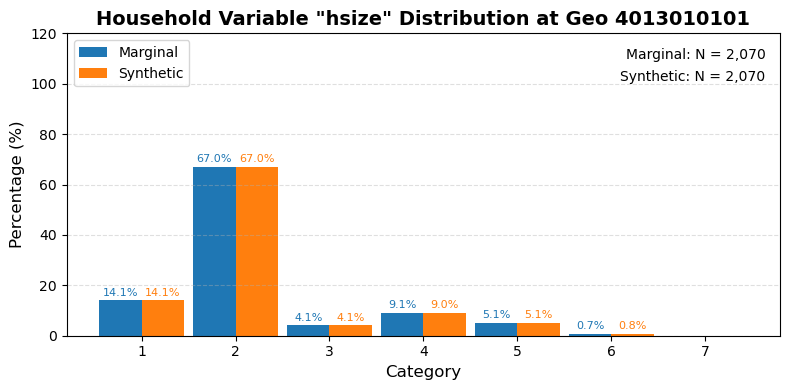

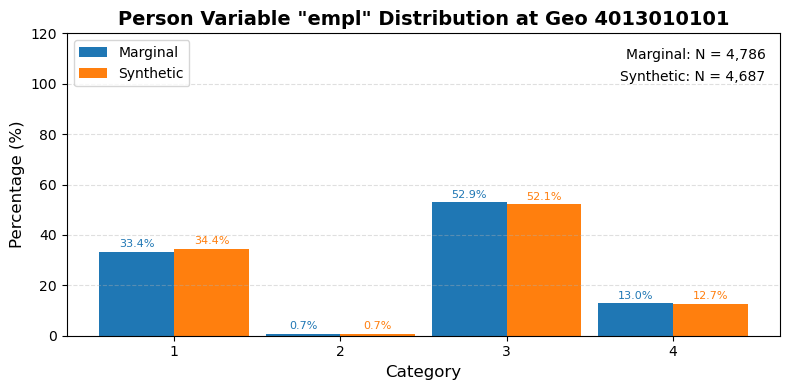

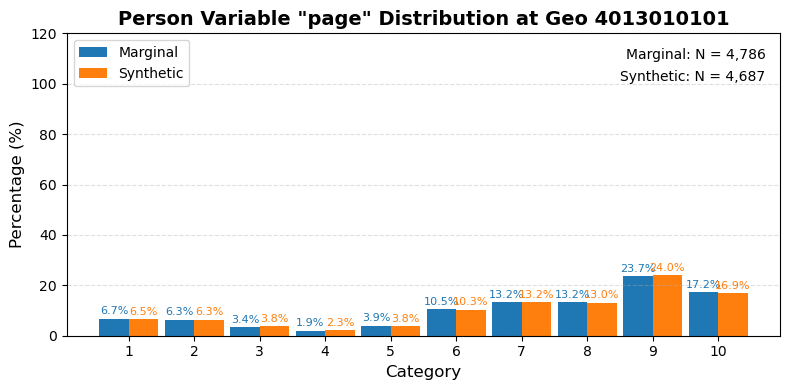

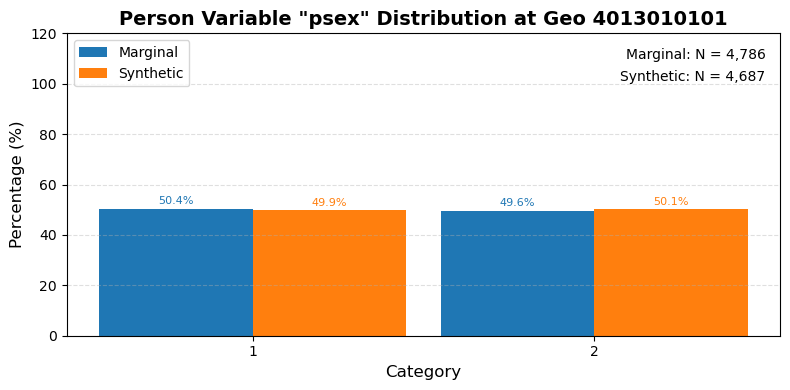

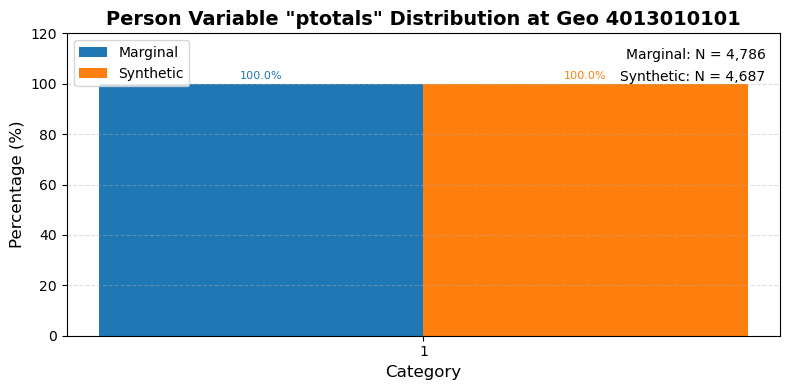


                     📍 GEO: 4013010102                      



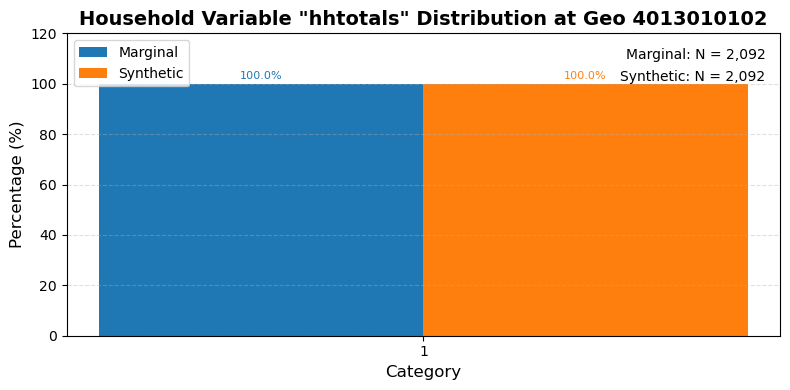

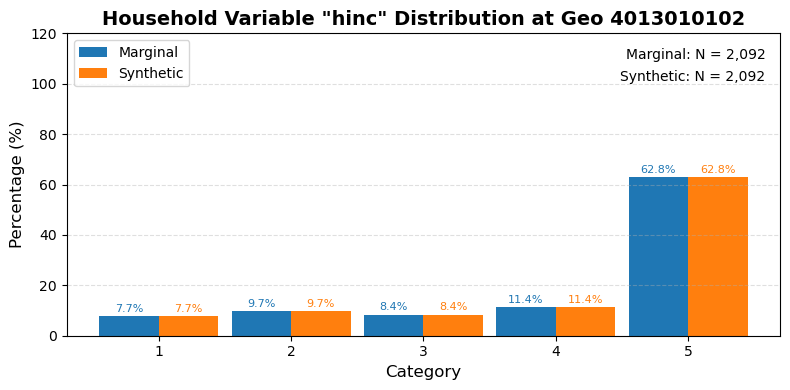

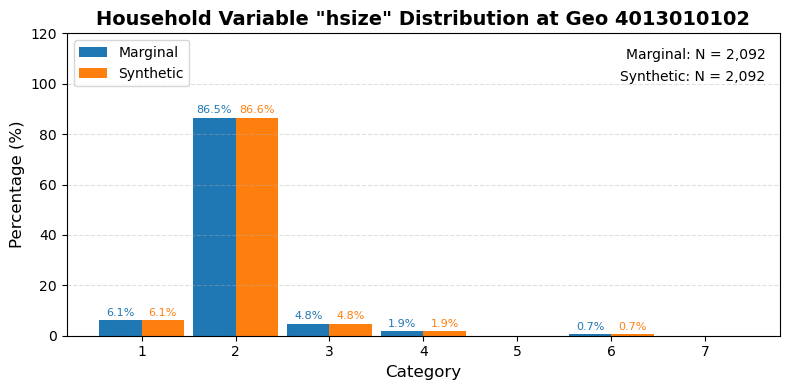

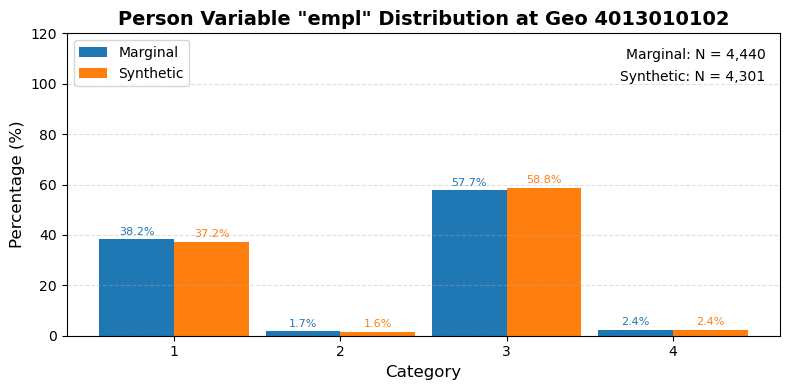

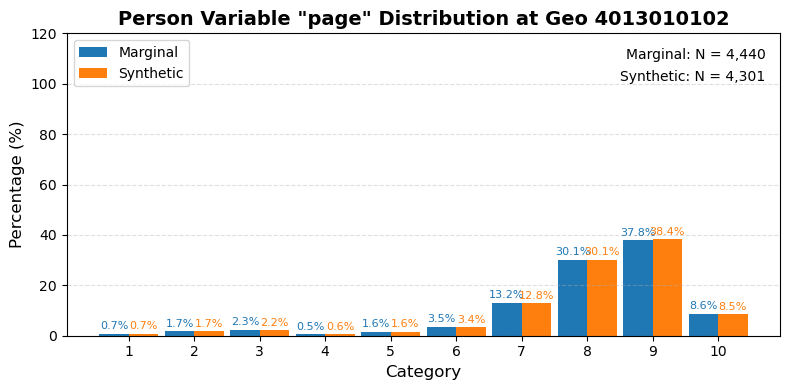

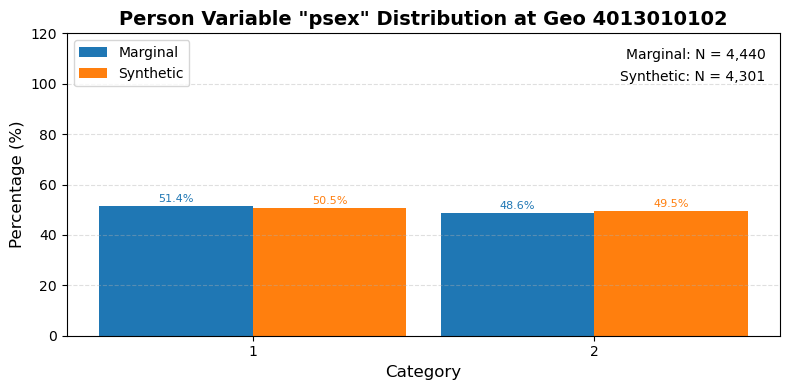

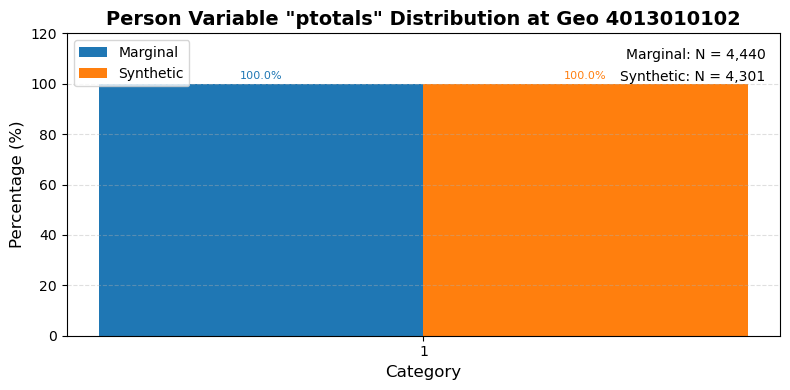

In [50]:
plot_synthetic_vs_marginal_comparison(
    housing_synthetic_df=housing_synthetic,
    housing_marginal_df=household_marginal,
    person_synthetic_df=person_synthetic,
    person_marginal_df=person_marginal,
    geo_col='geo',
#     output_pdf_path='housing_synthetic_vs_marginal.pdf'
)

In [51]:
os.getcwd()

'/Users/chnfanyu/ASU Dropbox/Yu Fan/Mac/Documents/GitHub/PopGen3/data'